# **The Impact of Academic Stress on Mental Health**
![Our Logo](banner.jpg)
## Machine Learning Analysis: Predicting Depression Severity (PHQ-9) from Academic Stress in Egyptian University Students
---
---
### Overview
This study develops a supervised machine learning model to predict depression severity among university students, categorized into low, moderate, and high classes based on the PHQ-9 scale. The dataset includes 426 rows and features like study hours and financial difficulties.

### Objective
The primary aim is to classify students into PHQ-9 depression severity classes using supervised multi-class classification. Key features include academic variables (e.g., study hours, grades) and stressors (e.g., financial difficulties). The model will support university mental health systems by identifying students requiring intervention, with performance evaluated via accuracy, precision, recall, and F1-score.

### Table of Contents

1. Import Libraries
2. Load and Explore Dataset
3. Data Preprocessing
    - 3.1 Feature Selection
    - 3.2 Encoding Categorical Features
    - 3.3 Train-Test Split
    - 3.4 Scale Numerical Features
    - 3.5 Handle Class Imbalance with SMOTE
4. Exploratory Data Analysis (EDA)
    - 4.1 Visualize Feature Distributions
    - 4.2 Analyze Relationships with Pair Plot
    - 4.3 Spearman Correlation Heatmap
    - 4.4 Statistical Test: t-test for gender_Male vs. phqs
5. Model Selection and Training
    - 5.1 Define Models
    - 5.2 Train and Evaluate Models
    - 5.3 Compare Model Performance
    - 5.4 Feature Importance Analysis
6. Conclusion and Next Steps

---
### 1. Import Libraries

First, we import all necessary libraries for data manipulation, visualization, statistical analysis, and machine learning.

In [37]:
# Numerical and Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
%matplotlib inline
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap

# Mathematic and Statistics Libraries
from scipy.stats import ttest_ind
from scipy import stats
import math

# Machine Learning Libraries
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split             
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, OrdinalEncoder 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

In [38]:
# Define hex colors
PRIMARY_COLOR = '#88a6dc'
EDGE_COLOR = '#2a3348'
GRID_TEXT_COLOR = '#707070'
BACKGROUND_COLOR = '#1F1F1F'
WHITE = "#FFFFFF"

# Set plot style
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = BACKGROUND_COLOR
plt.rcParams['figure.facecolor'] = BACKGROUND_COLOR
plt.rcParams['text.color'] = GRID_TEXT_COLOR
plt.rcParams['axes.labelcolor'] = GRID_TEXT_COLOR
plt.rcParams['xtick.color'] = GRID_TEXT_COLOR
plt.rcParams['ytick.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.color'] = GRID_TEXT_COLOR
plt.rcParams['grid.alpha'] = 0.3

# Set the Seaborn style
sns.set_style("darkgrid", {
    'axes.facecolor': BACKGROUND_COLOR,
    'figure.facecolor': BACKGROUND_COLOR,
    'axes.edgecolor': EDGE_COLOR,
    'grid.color': GRID_TEXT_COLOR,
    'xtick.color': GRID_TEXT_COLOR,
    'ytick.color': GRID_TEXT_COLOR,
    'text.color': GRID_TEXT_COLOR,
    'axes.labelcolor': GRID_TEXT_COLOR,
    'axes.titlecolor': GRID_TEXT_COLOR,
})

---
### 2. Load and Explore Dataset

We load the dataset from an Excel file and explore its structure to understand its contents and dimensions.


In [39]:
#reading the data file and displaying first 5 rows
data = pd.read_excel("DEPI Graduation Project.xlsx")
data.head()

,Number,age,gender,status,living,work,faculty,uni,level,wsh,...,Friends,Therapist/Coaching,No one,us,phq,phqs,comf,comfs,st,sts
0,3,20,Male,Single,With Family,Not working,Science,Mansoura,level 3,21–30 hours,...,0,1,1,No,20,Severe depression,1,Neutral,9,Moderate Stress
1,5,19,Female,Single,With Family,Not working,Science,Mansoura,level 1,10–20 hours,...,1,0,-2,No,10,Moderate depression,-1,Uncomfortable,10,High Stress
2,6,19,Female,Single,With Family,Not working,Science,Mansoura,level 2,21–30 hours,...,1,1,-2,No,21,Severe depression,0,Neutral,7,Moderate Stress
3,12,21,Male,Single,With Family,Not working,Science,Mansoura,level 3,Less than 10 hours,...,1,-2,-2,No,24,Severe depression,-5,Uncomfortable,9,Moderate Stress
4,20,20,Female,Single,With Family,Not working,Science,Mansoura,level 3,21–30 hours,...,0,-1,1,No,9,Mild depression,-1,Uncomfortable,5,Moderate Stress


### Data Preprocessing

The target variable is `phqs`, categorized as:
- Minimal Depression (0–4)
- Mild Depression (5–9)
- Moderate Depression (10–14)
- Moderately Severe Depression (15-19)
- Severe Depression (20-27)



In [40]:
# Get column names as a list
column_list = data.columns.tolist()
print(column_list)

# knowing number of rows and columns of our data
data.shape

['Number', 'age', 'gender', 'status', 'living', 'work', 'faculty', 'uni', 'level', 'wsh', 'grade', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [فقدان الشغف]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [القلق أو الإكتئاب أو اليأس]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [مشاكل فى النوم]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [الإرهاق الجسدى]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [فقدان الشهية]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [الشعور بأنك فاشل]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [صعوبة في التركيز]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [متعصب بشكل ملحوظ]', 'خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [الرغبة فى إيذاء النفس]', 'Family Expectations', 'Financial Difficulties', 'Fear of Unemployment', 'Work-Study Balance', 'Family', 'Friends', 'Therapist/Coaching', 'No one', 'us'

(426, 35)

---
#### Dropping Unnecessary Columns
Some columns are questions to determine scores for the mental health of the student, and these scores are collected later in others columns like: (`phq`), (`comf`), (`st`).

Other columns are categorical data not needed in our ML moel like: (`uni`) & (`faculty`).

In [41]:
#Select relevant features and drop redundant columns
df = data.drop(columns = ["خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [فقدان الشغف]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [القلق أو الإكتئاب أو اليأس]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [مشاكل فى النوم]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [الإرهاق الجسدى]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [فقدان الشهية]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [الشعور بأنك فاشل]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [صعوبة في التركيز]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [متعصب بشكل ملحوظ]",
                          "خلال الأسبوعين الماضيين، كم مرة واجهت أي من المشاكل التالية؟ [الرغبة فى إيذاء النفس]",
                          "Number", "Family Expectations", "Financial Difficulties", "Fear of Unemployment", "Family",
                          "Work-Study Balance", "Friends", "Therapist/Coaching", "No one", "uni", "faculty"])
# Display first 5 rows
df.head()

,age,gender,status,living,work,level,wsh,grade,us,phq,phqs,comf,comfs,st,sts
0,20,Male,Single,With Family,Not working,level 3,21–30 hours,Good,No,20,Severe depression,1,Neutral,9,Moderate Stress
1,19,Female,Single,With Family,Not working,level 1,10–20 hours,Good,No,10,Moderate depression,-1,Uncomfortable,10,High Stress
2,19,Female,Single,With Family,Not working,level 2,21–30 hours,Excellent,No,21,Severe depression,0,Neutral,7,Moderate Stress
3,21,Male,Single,With Family,Not working,level 3,Less than 10 hours,Good,No,24,Severe depression,-5,Uncomfortable,9,Moderate Stress
4,20,Female,Single,With Family,Not working,level 3,21–30 hours,Very Good,No,9,Mild depression,-1,Uncomfortable,5,Moderate Stress


In [42]:
# Get column names as a list
column_list = df.columns.tolist()
print(column_list)

# knowing number of rows and columns of our data
df.shape

['age', 'gender', 'status', 'living', 'work', 'level', 'wsh', 'grade', 'us', 'phq', 'phqs', 'comf', 'comfs', 'st', 'sts']


(426, 15)

**Key Statistics:**
| Feature                | Description                                              | Type        |
|------------------------|----------------------------------------------------------|-------------|
| `age`                  | Age of the student (in years)                            | Numerical   |
| `gender`               | Gender of the student (Male, Female)                     | Categorical - Nominal |
| `status`               | Social or relationship status (e.g., single, married)    | Categorical - Nominal |
| `living`               | Living arrangement (e.g., with family, University Housing) | Categorical - Nominal |
| `work`                 | Employment status (e.g., not working, part-time)           | Categorical - Nominal |
| `level`                | Academic level (e.g., Level 1, Level 2, etc.)         | Categorical - Ordinal |
| `wsh`                  | Weekly study hours (e.g., 10–20 hours, Less than 10 hours)         | Categorical - Ordinal |
| `grade`                | Academic performance (e.g., Excellent, Very Good)       | Categorical - Ordinal |
| `us`                   | University satisfaction of Mental Health Support (Yes, No)           |  Categorical - Nominal  |
| `phq`                  | PHQ-9 score (0–27, measuring depression severity)        | Numerical   |
| `phqs`                 | PHQ-9 severity class (low, moderate, high)               | Categorical - Ordinal |
| `comf`                 | Comfort level with academic environment                  | Numerical   |
| `comfs`                | Comfort level category (e.g., low, high)                 | Categorical - Ordinal |
| `st`                   | Stress level score                                       | Numerical   |
| `sts`                  | Stress level category (e.g., low, high)                  | Categorical - Ordinal |

---
#### Initial Inspection
In this section after loading the dataset, it displays its structure, and checks for missing values and data types to inform preprocessing.


In [43]:
# knowing & checking our data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     426 non-null    int64 
 1   gender  426 non-null    object
 2   status  426 non-null    object
 3   living  426 non-null    object
 4   work    426 non-null    object
 5   level   426 non-null    object
 6   wsh     426 non-null    object
 7   grade   426 non-null    object
 8   us      426 non-null    object
 9   phq     426 non-null    int64 
 10  phqs    426 non-null    object
 11  comf    426 non-null    int64 
 12  comfs   426 non-null    object
 13  st      426 non-null    int64 
 14  sts     426 non-null    object
dtypes: int64(4), object(11)
memory usage: 50.1+ KB


### Classifying our data features
to prepare for encoding

In [44]:
#showing all possible values for each column
for col in df.columns:
    print(f"{col}:", df[col].unique())
    print("------")

age: [20 19 21 18 22 23 25 17 24 29]
------
gender: ['Male' 'Female']
------
status: ['Single' 'Married' 'Engaged']
------
living: ['With Family' 'Independently' ' University Housing']
------
work: ['Not working' 'Part-time' 'Full-time']
------
level: ['level 3' 'level 1' 'level 2' 'level 4' 'Internship' 'level 5']
------
wsh: ['21–30 hours' '10–20 hours' 'Less than 10 hours' 'More than 30 hours']
------
grade: ['Good' 'Excellent' 'Very Good' 'Fair']
------
us: ['No' 'Yes']
------
phq: [20 10 21 24  9 12 14  7 17 27 22 13 16  8 15 18 19 23  6 11  3  4  5 25
  2  0 26]
------
phqs: ['Severe depression' 'Moderate depression' 'Mild depression'
 'Moderately severe depression' 'Minimal depression']
------
comf: [ 1 -1  0 -5 -3 -8 -2 -4  3  2 -6  4]
------
comfs: ['Neutral' 'Uncomfortable' 'Very Comfortable']
------
st: [ 9 10  7  5  8  4  3 12  6 11  0  2  1]
------
sts: ['Moderate Stress' 'High Stress' 'Low Stress']
------


In [45]:
# Numeric features
numerical_cols = ['age', 'phq', 'comf', 'st']

# Categoical features
categorical_cols = ['gender', 'status', 'living', 'work', 'us', 'level', 'wsh', 'grade', 'comfs', 'sts', 'phqs']

# Nominal features
nominal_cols = ['gender', 'status', 'living', 'work', 'us']

# Ordinal features and their custom order
ordinal_cols = ['level', 'wsh', 'grade', 'phqs', 'comfs', 'sts']
ordinal_categories = [
    ['level 1', 'level 2', 'level 3', 'level 4', 'level 5', 'Internship'],  # academic_level
    ['Less than 10 hours', '10–20 hours', '21–30 hours', 'More than 30 hours'],  # wsh
    ['Fair', 'Good', 'Very Good', 'Excellent'],  # grade
    ['Minimal depression', 'Mild depression', 'Moderate depression', 'Moderately severe depression', 'Severe depression'],  # phq_status
    ['Very Comfortable', 'Neutral', 'Uncomfortable'],  # comfort_status
    ['Low Stress', 'Moderate Stress', 'High Stress']  # stress_status 
]

---

#### Data Cleaning
Our data is already cleaned, as we don't have messing values neither for numerical features nor for categorical features



In [46]:
# Knowing statistical information about our data
df.describe()

,age,phq,comf,st
count,426.000000,426.000000,426.000000,426.000000
mean,20.453052,15.173709,-1.197183,7.713615
std,1.354349,5.873799,2.485457,2.469132
min,17.000000,0.000000,-8.000000,0.000000
25%,20.000000,11.000000,-3.000000,6.000000
50%,20.000000,15.000000,-1.000000,8.000000
75%,21.000000,19.000000,0.000000,9.000000
max,29.000000,27.000000,4.000000,12.000000


In [47]:
#checking for missing values (our Google form's mcq questions are all required)
df.isnull().sum()

age       0
gender    0
status    0
living    0
work      0
level     0
wsh       0
grade     0
us        0
phq       0
phqs      0
comf      0
comfs     0
st        0
sts       0
dtype: int64

In [48]:
# Checking for dublicates
dublicates = df[df.duplicated()]
dublicates

,age,gender,status,living,work,level,wsh,grade,us,phq,phqs,comf,comfs,st,sts
105,21,Male,Single,With Family,Not working,level 4,21–30 hours,Excellent,No,14,Moderate depression,-1,Uncomfortable,8,Moderate Stress


In [49]:
# Dropping Dublicates
df.drop_duplicates(inplace= True)

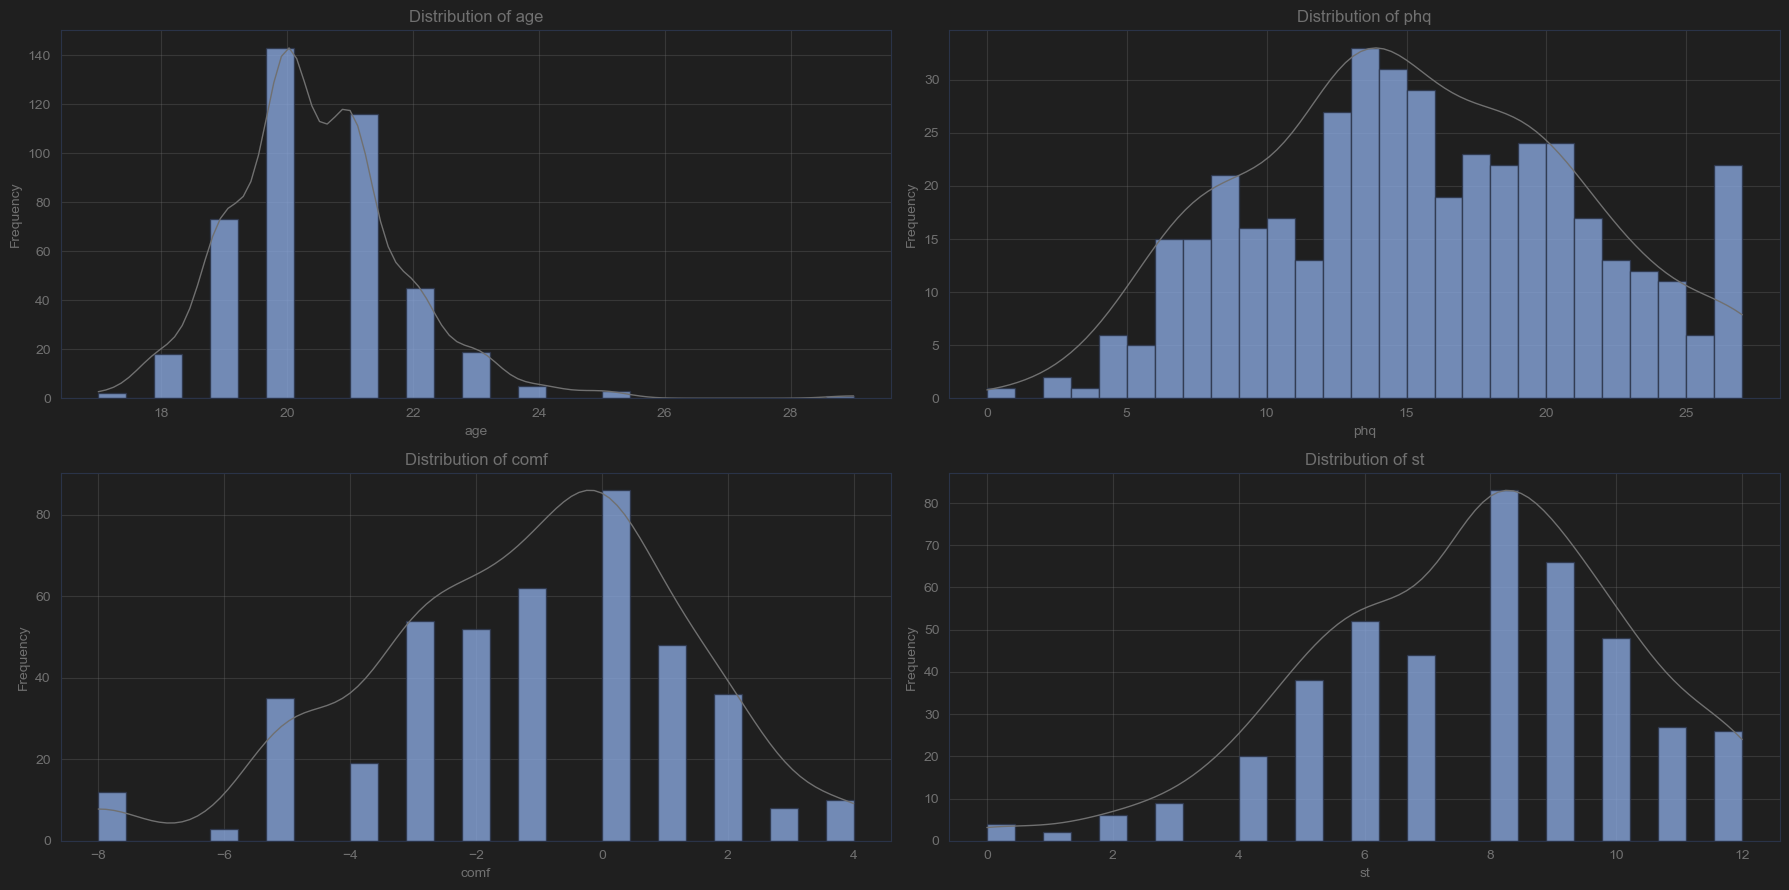

In [50]:
plt.close('all')

# Histogram Distributions
fig, axes = plt.subplots(2, 2, figsize=(18, 9))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    n, bins, patches = axes[i].hist(df[col].dropna(), bins=27, color=PRIMARY_COLOR, edgecolor=EDGE_COLOR, alpha=0.8)

    # KDE computation
    density = stats.gaussian_kde(df[col].dropna())
    x_vals = np.linspace(df[col].min(), df[col].max(), 100)
    y_vals = density(x_vals)

    # Scale KDE to histogram
    hist_max = n.max()
    kde_max = y_vals.max()
    scaling_factor = hist_max / kde_max if kde_max > 0 else 1

    axes[i].plot(x_vals, y_vals * scaling_factor, color=GRID_TEXT_COLOR, linewidth=1)
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(True)

plt.tight_layout()
plt.show()


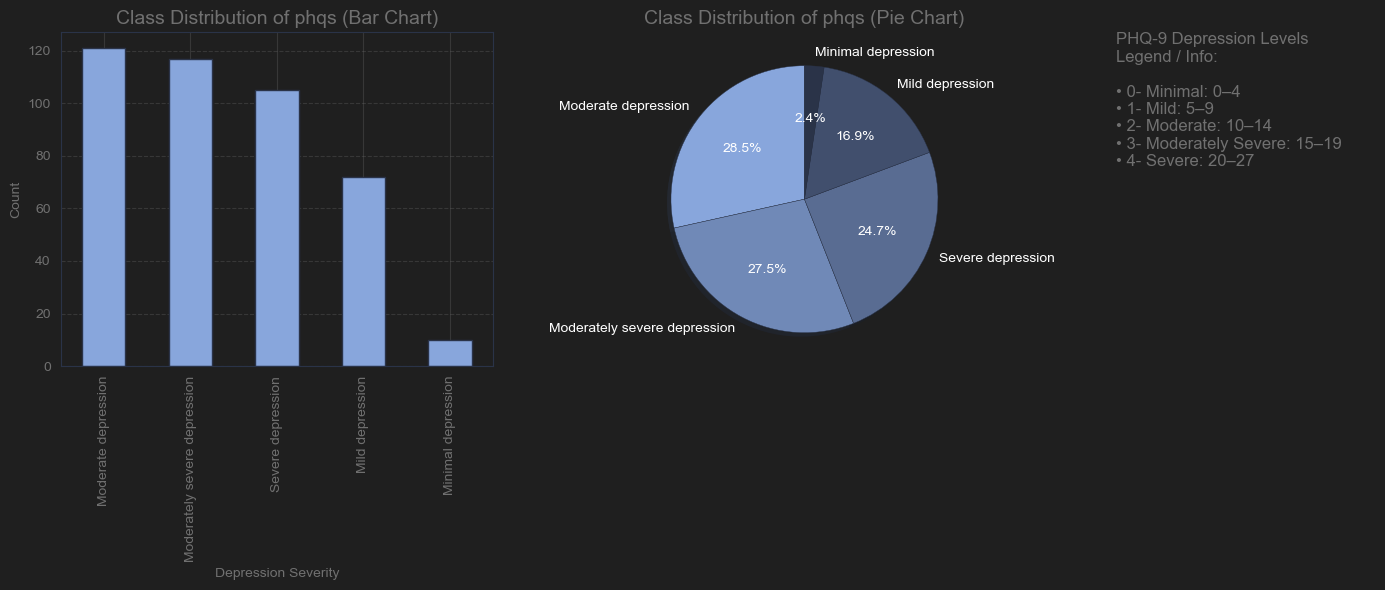

In [51]:
# Get unique value count
num_classes = df['phqs'].nunique()

# Create color gradient from PRIMARY_COLOR to EDGE_COLOR
color_map = mcolors.LinearSegmentedColormap.from_list("custom_gradient", [PRIMARY_COLOR, EDGE_COLOR])
pie_colors = [color_map(i / (num_classes - 1)) for i in range(num_classes)]

# Create the figure and subplots with more space between plots
fig, axs = plt.subplots(1, 3, figsize=(14, 6), gridspec_kw={'width_ratios': [1, 1, 0.6]})
fig.patch.set_facecolor(BACKGROUND_COLOR)

# Bar chart
df['phqs'].value_counts().plot(
    kind='bar', 
    color=PRIMARY_COLOR, 
    edgecolor=EDGE_COLOR, 
    ax=axs[0]
)
axs[0].set_title('Class Distribution of phqs (Bar Chart)', fontsize=14)
axs[0].set_xlabel('Depression Severity', fontsize=10, color=GRID_TEXT_COLOR)
axs[0].set_ylabel('Count', fontsize=10, color=GRID_TEXT_COLOR)
axs[0].tick_params(colors=GRID_TEXT_COLOR)
axs[0].grid(True, axis='y', color=GRID_TEXT_COLOR, linestyle='--')

# Pie chart
df['phqs'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=pie_colors[:df['phqs'].nunique()],
    shadow=True,
    startangle=90,
    ax=axs[1],
    textprops={'color': 'white'},
    wedgeprops={'edgecolor': EDGE_COLOR, 'linewidth': 0.3}

)
axs[1].set_title('Class Distribution of phqs (Pie Chart)', fontsize=14)
axs[1].set_ylabel('')

# Custom list on the right
axs[2].axis('off')
custom_text = [
    "PHQ-9 Depression Levels\nLegend / Info:\n",
    "• 0- Minimal: 0–4",
    "• 1- Mild: 5–9",
    "• 2- Moderate: 10–14",
    "• 3- Moderately Severe: 15–19",
    "• 4- Severe: 20–27"
]
axs[2].text(0, 1, '\n'.join(custom_text), fontsize=12, verticalalignment='top')

plt.tight_layout()
plt.show()


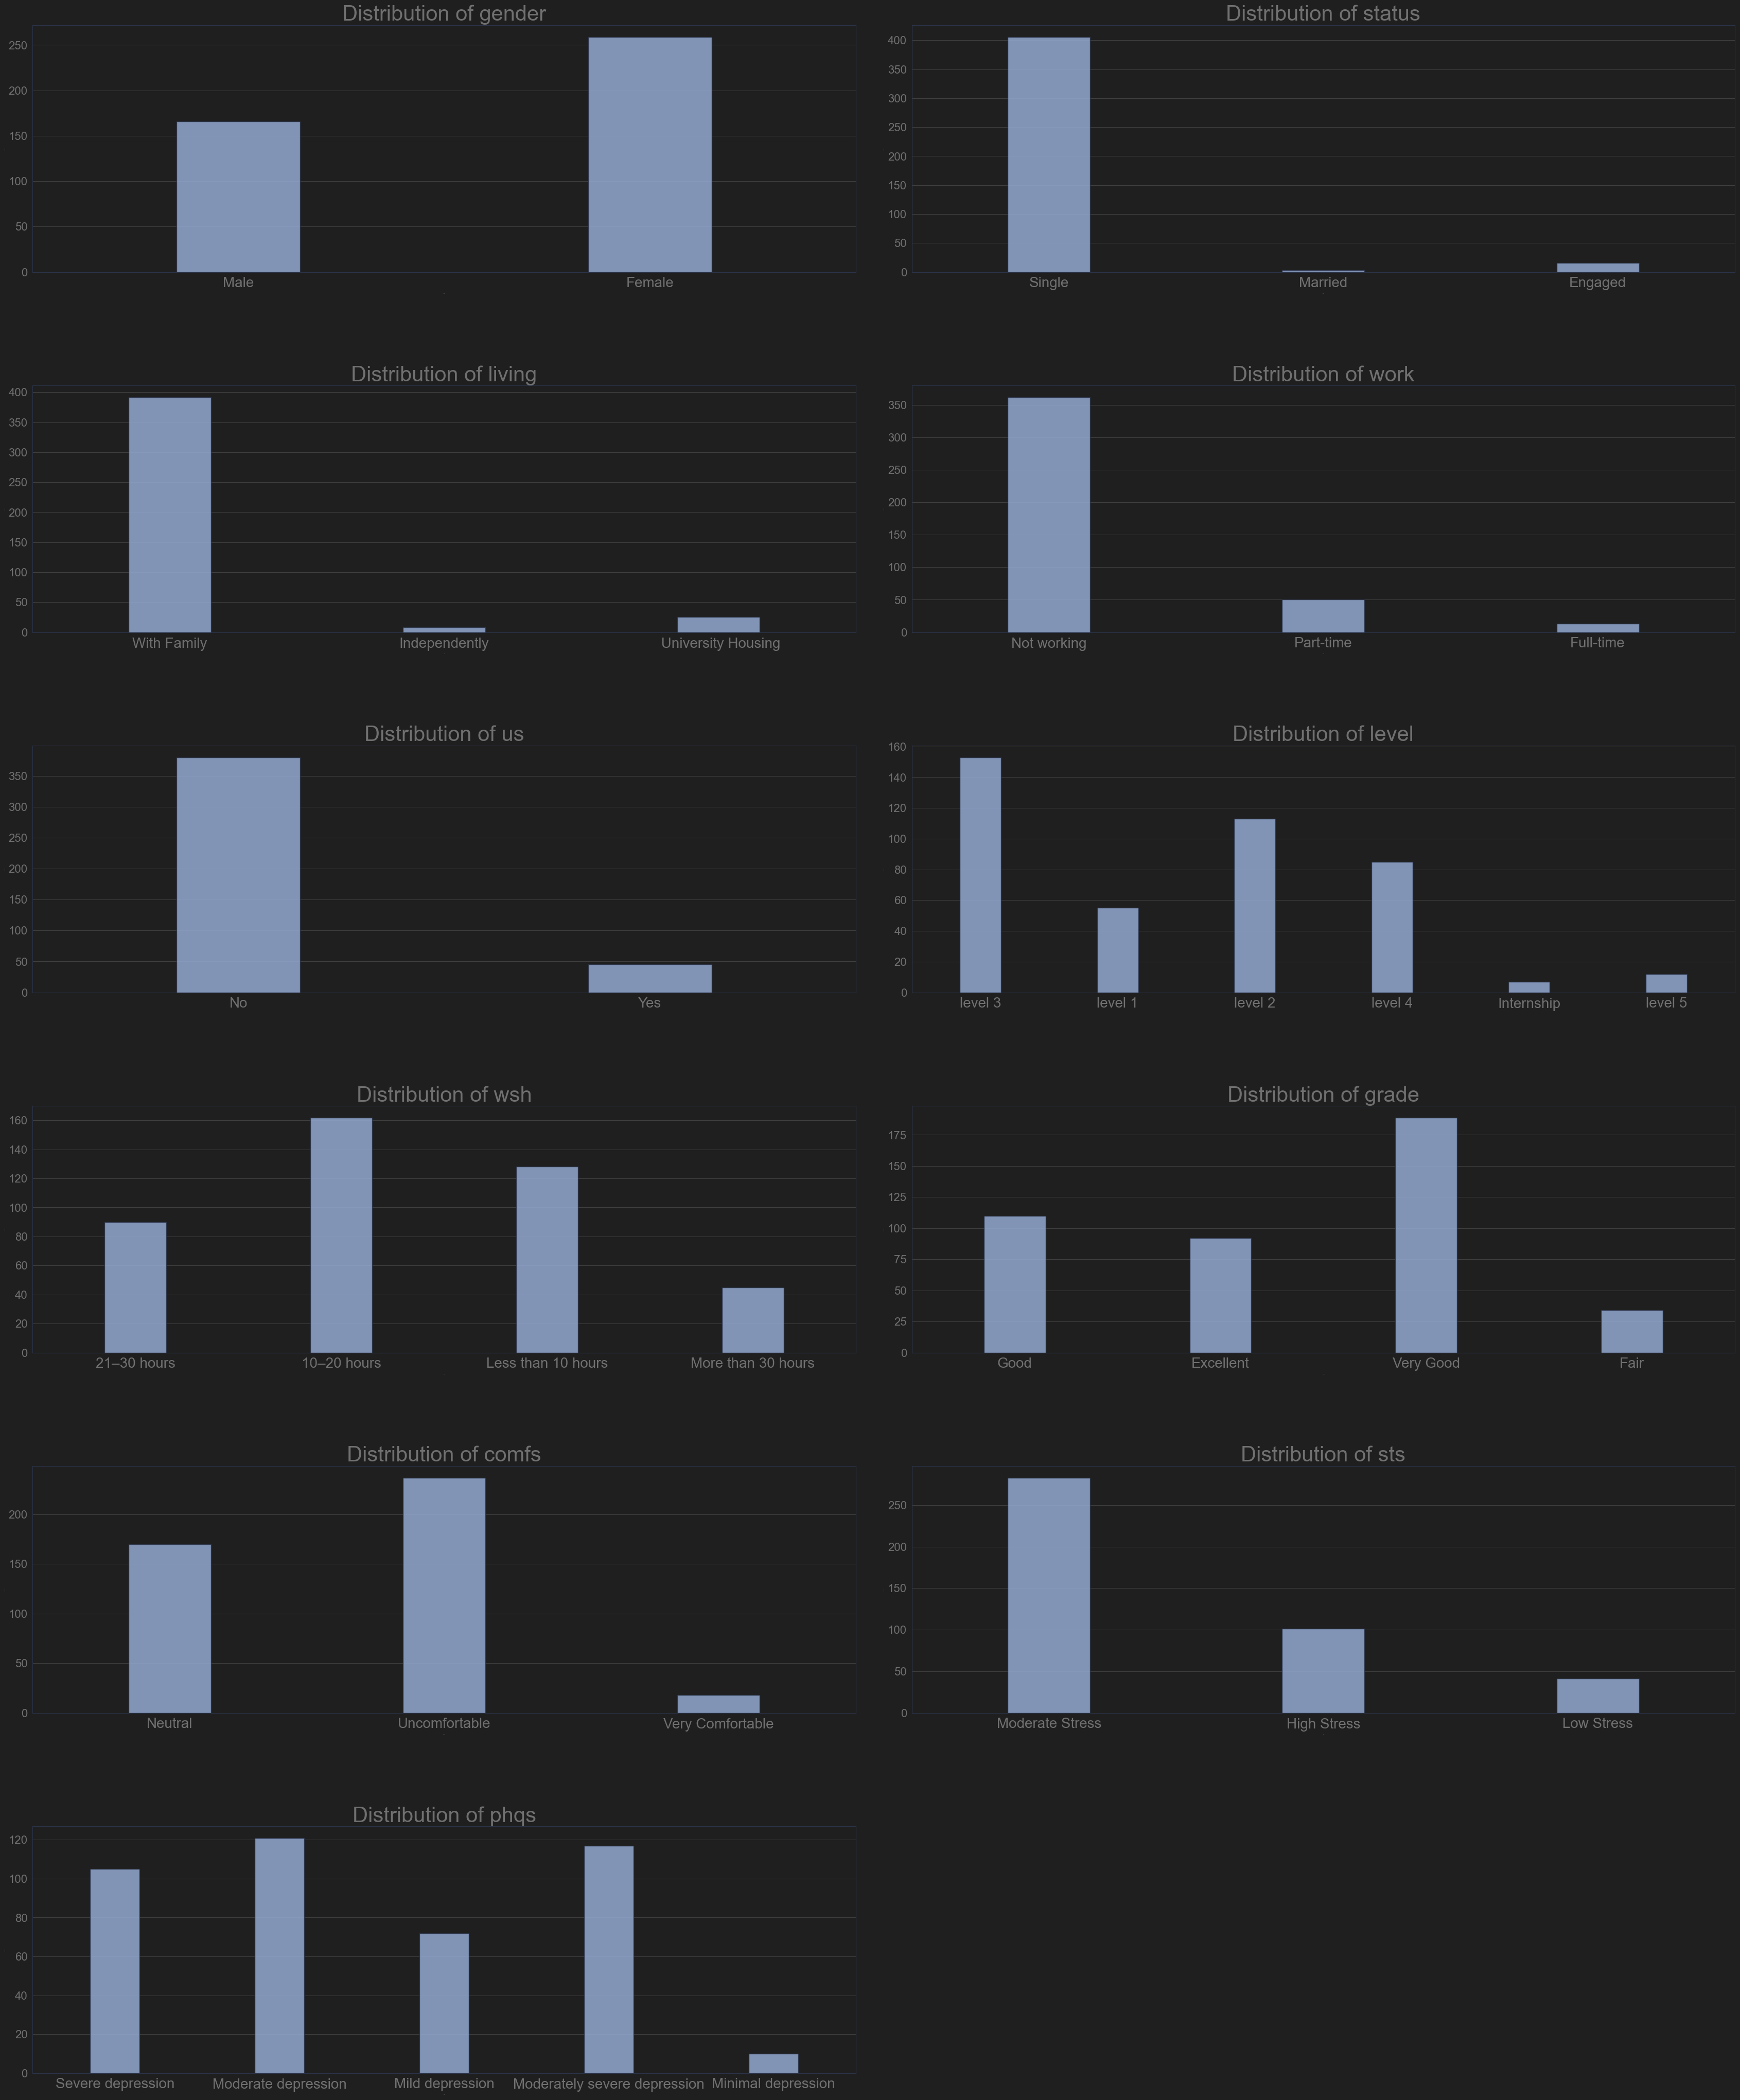

In [52]:
plt.close('all')

# Number of plots = number of categorical columns
n_cols = len(categorical_cols)
n_rows = math.ceil(n_cols / 2)  # Two plots per row

# Create subplots grid
fig, axes = plt.subplots(n_rows, 2, figsize=(35, n_rows * 7))
axes = axes.flatten()

# Loop over each categorical column
for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i], color=PRIMARY_COLOR, edgecolor=EDGE_COLOR, alpha=0.85, width=0.3)
    axes[i].set_title(f'Distribution of {col}', fontsize=30)
    axes[i].set_xlabel(col, fontsize=0)
    axes[i].tick_params(axis='x', labelsize=20)
    axes[i].tick_params(axis='y', labelsize=16)
    axes[i].set_ylabel('Frequency', fontsize= 0)
    axes[i].grid(True, axis='y', linestyle='-', alpha=0.4)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=5.0, w_pad=4.0, h_pad=10.0)
plt.show()

In [53]:
# Drop less weight data
df = df.drop(columns= ['status', 'living', 'work', 'us'])

# Get column names as a list
column_list = df.columns.tolist()
print(column_list)

# knowing number of rows and columns of our data
df.shape

['age', 'gender', 'level', 'wsh', 'grade', 'phq', 'phqs', 'comf', 'comfs', 'st', 'sts']


(425, 11)

In [54]:
# Set Plotly theme and styling
fig_config = {
    'plot_bgcolor': BACKGROUND_COLOR,
    'paper_bgcolor': BACKGROUND_COLOR,
    'font': {'color': GRID_TEXT_COLOR, 'size': 12},  # Light gray text
    'title': {'x': 0.5, 'xanchor': 'center', 'font': {'size': 16}},  # Centered title
}

# Create horizontal box plots for each numerical column
for col in numerical_cols:
    fig = px.box(df, x=col,  # Use x=col for horizontal orientation
                 title=f'Distribution of {col} with Outliers',
                 color_discrete_sequence=[PRIMARY_COLOR],  # Specific hex color
                 points='outliers')  # Show outliers explicitly
    
    # Apply styling
    fig.update_layout(**fig_config)
    fig.update_traces(marker=dict(size=9), line=dict(width=2))  # Customize box plot appearance
    fig.update_xaxes(gridcolor=GRID_TEXT_COLOR, zerolinecolor=EDGE_COLOR)  # Light grid lines for x-axis
    
    
    # Display plot
    fig.show()

In [55]:
# Replacing outliers with the median
#replacing ages > 22 with median (20)

# Calculating the median of ages > 22 (Upper)
mdn = df.loc[df['age'] > 22, 'age'].median()

# Making all ages > 22 nulls
df.loc[df.age > 22, 'age'] = np.nan

# Replacing nulls (ages > 22) with their median
df.fillna(mdn, inplace= True)

### Encoding Categorical Features

We encode categorical features (wsh, grade, gender, phqs) to numerical values for modeling.

In [56]:
# Create the encoder with category ordering
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)

# Apply encoding to ordinal features only
df[ordinal_cols] = ordinal_encoder.fit_transform(df[ordinal_cols])

# One-hot encode Nominal features
df = pd.get_dummies(df, columns= ['gender'], drop_first=True).astype(int)

df.head()

,age,level,wsh,grade,phq,phqs,comf,comfs,st,sts,gender_Male
0,20,2,2,1,20,4,1,1,9,1,1
1,19,0,1,1,10,2,-1,2,10,2,0
2,19,1,2,3,21,4,0,1,7,1,0
3,21,2,0,1,24,4,-5,2,9,1,1
4,20,2,2,2,9,1,-1,2,5,1,0


Before choosing Pearson or Spearman, we need to visualize the data to assess the relationship type.
- Scatter Plots for Each Feature vs. Target (phqs)
    - What to Look For:
        - Linear: Points form a roughly straight line (e.g., as age increases, phqs decreases steadily).
        - Monotonic (Non-Linear): Points follow a consistent upward or downward trend but curve (e.g., comf drops sharply at -8, then flattens).
        - No Pattern: Points are scattered randomly, suggesting no strong correlation.

- Pair Plot with Regression Line
    - What to Do: Use sns.pairplot with a regression line (kind="reg") to see trends.
        - How: Add kind="reg" to the pair plot code.
        - What to Look For:
        - A straight regression line suggests Pearson.
        - A curved or step-like line suggests Spearman.

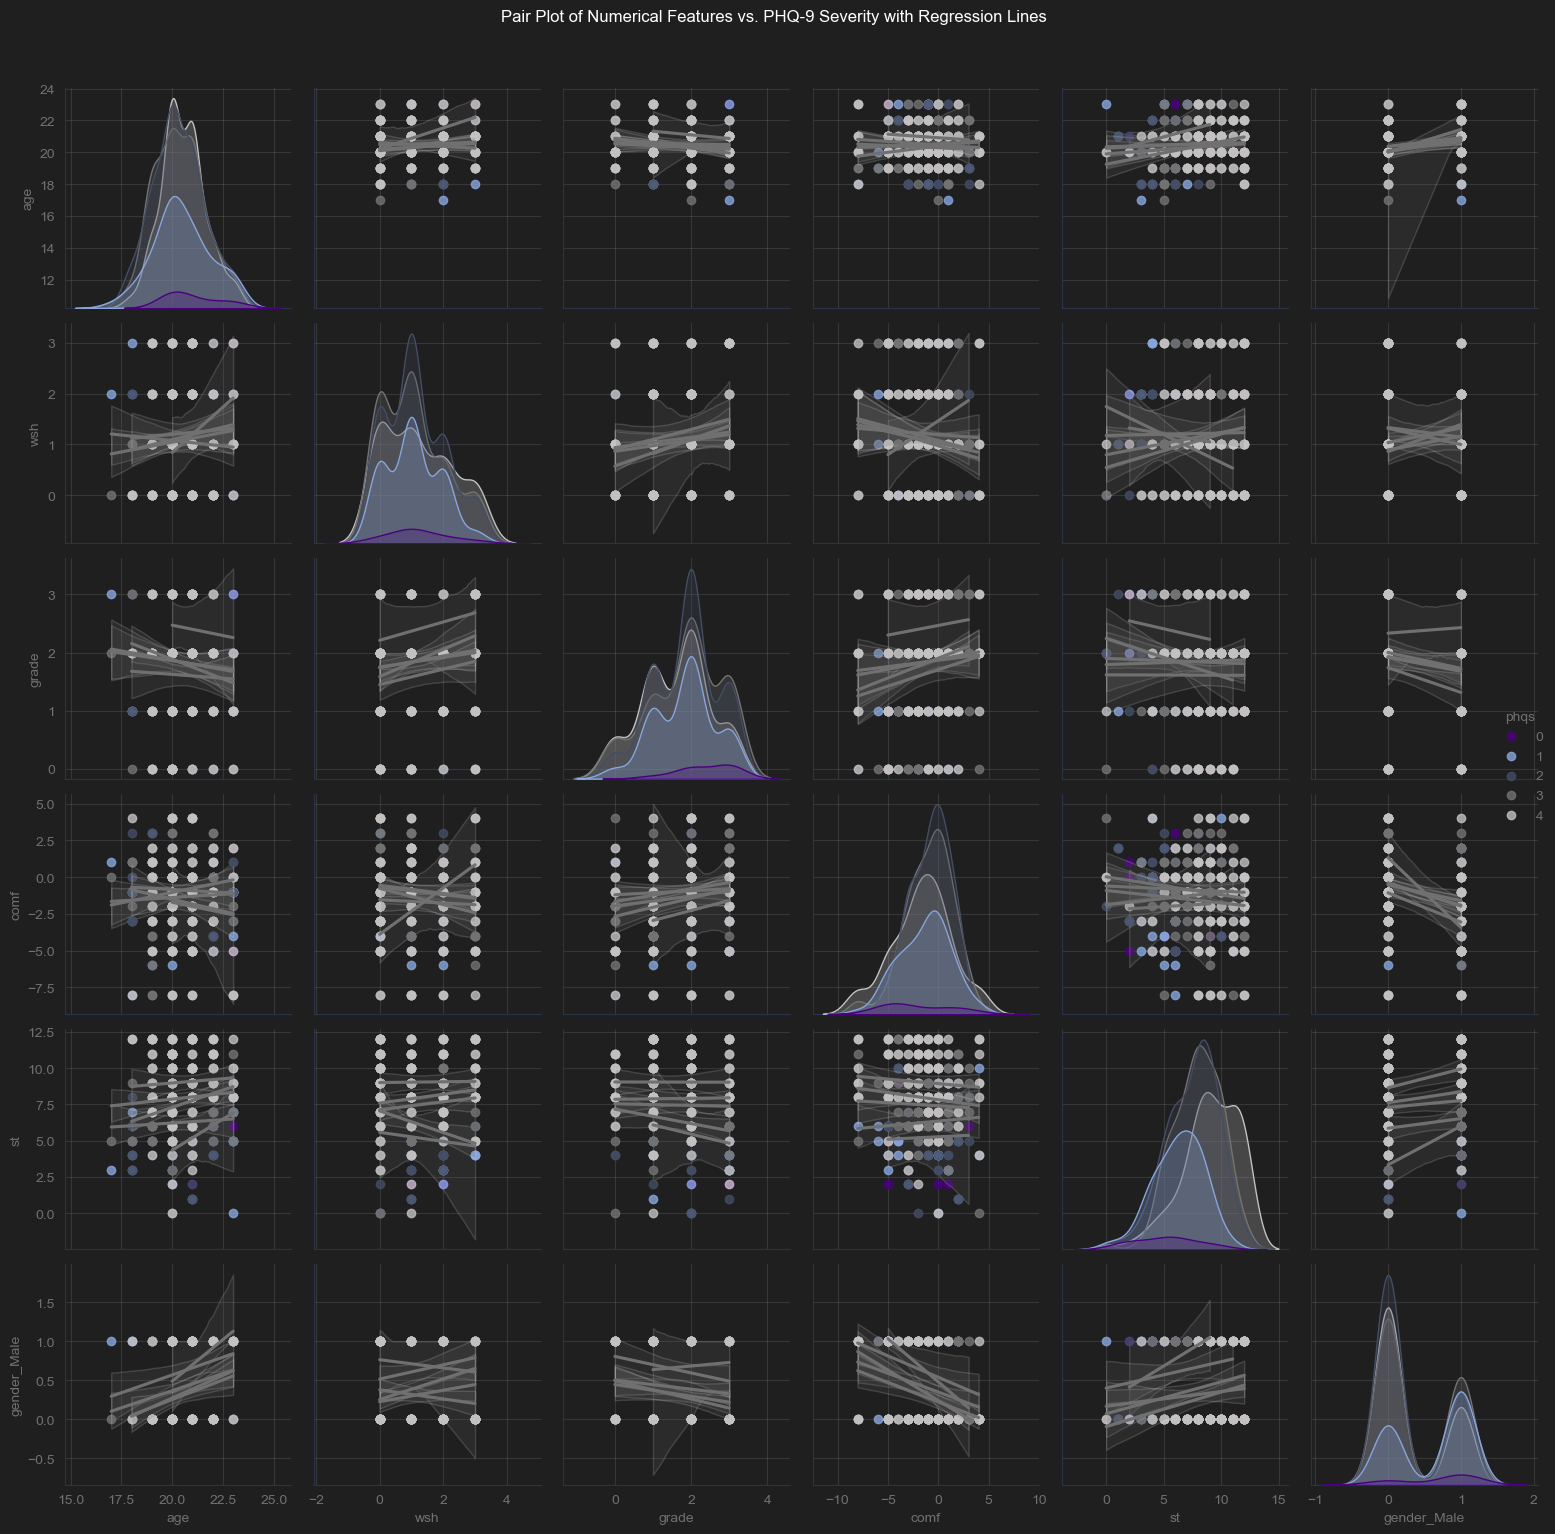

In [57]:
# Graph 5: Pair Plot with Regression Lines and Custom Color Scheme
# Define a custom purple-heavy palette for the 5 'phqs' classes
pltt = {
    0: '#4B0082',  # (Minimal)
    1: PRIMARY_COLOR,  # (Mild)
    2: '#434d64',  # (Moderate)
    3: '#737373',  # (Moderately Severe)
    4: '#c3c1c1'   # (Severe)
}

# Create pair plot with custom settings
g = sns.pairplot(
    df[['age', 'wsh', 'grade', 'phqs', 'comf', 'st', 'gender_Male']],
    hue='phqs',
    palette= pltt,
    kind="reg",
    plot_kws={'line_kws': {'color': GRID_TEXT_COLOR}}  # Regression lines in PRIMARY_COLOR
)

# Customize the plot elements
for ax in g.axes.flat:
    ax.set_facecolor(BACKGROUND_COLOR)
    for spine in ax.spines.values():
        spine.set_edgecolor(EDGE_COLOR)
    ax.grid(True)
    ax.tick_params(colors=GRID_TEXT_COLOR)
    if ax.get_title():
        ax.set_title(ax.get_title(), color=WHITE)
# Adjust layout
plt.suptitle('Pair Plot of Numerical Features vs. PHQ-9 Severity with Regression Lines', y=1.02, color=WHITE)
plt.tight_layout()
plt.show()

---
#### 3.3 Handling Multicollinearity

**Correlation refers to the statistical relationship between two variables. It measures how strongly they are related, with values typically ranging from -1 to +1:**
- +1 indicates a perfect positive correlation (both variables increase together).
- -1 indicates a perfect negative correlation (one variable increases while the other decreases).
-  0 means no correlation (no predictable relationship between the variables).

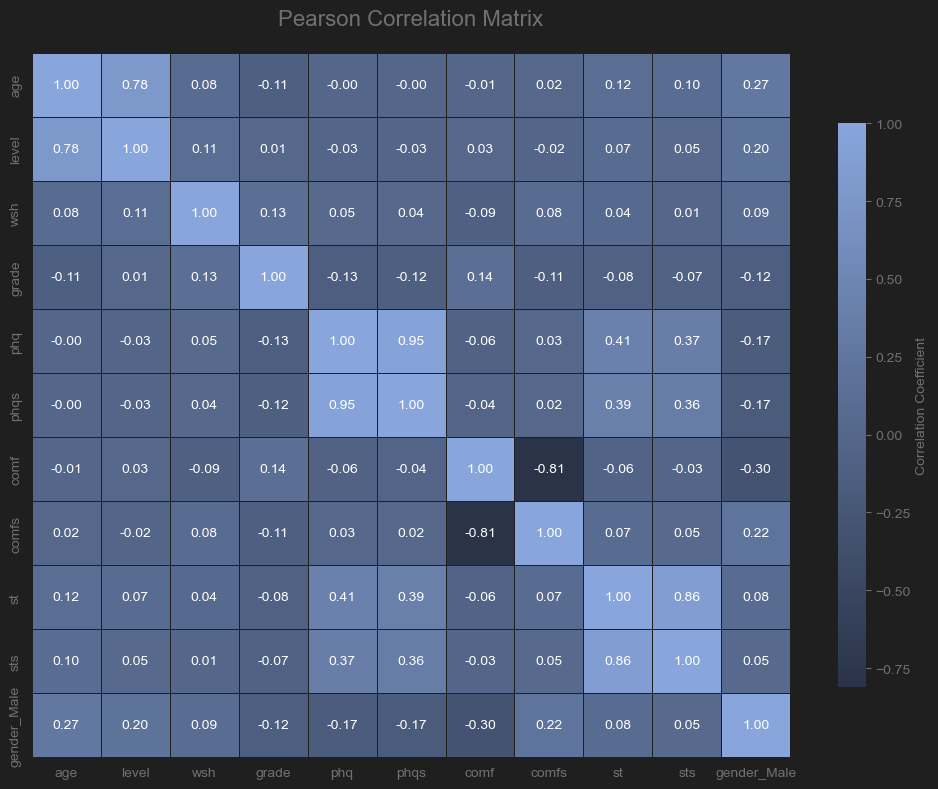

In [58]:
# Display correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))

# Create a custom colormap with the specific hex colors
colors = [EDGE_COLOR, PRIMARY_COLOR]  # Dark blue-gray to light blue-lavender
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=256)

# Create the heatmap with custom parameters
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap=custom_cmap,  # Using our custom color map 
            fmt='.2f', 
            linewidths=0.5,
            linecolor=BACKGROUND_COLOR,  # Dark gray for grid lines
            annot_kws={"color": WHITE},  # White annotation text
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Pearson Correlation Matrix', color=GRID_TEXT_COLOR, fontsize=16, pad=20)

# Add a bit of padding
plt.tight_layout()
plt.show()

### 1. Feature Relevance (Correlation with phqs)
Correlation with the target (phqs) indicates how much each feature contributes to predicting depression severity. Pearson correlation assumes a linear relationship, which may underestimate the importance of features in non-linear models (e.g., Random Forest), but it’s a good starting point.

**Strongest Predictor:**
- st (stress score): 0.393606 (moderate positive correlation)
    - Interpretation: Higher stress scores are associated with higher depression severity (e.g., Severe cases). This makes st a strong predictor, aligning with mental health literature (stress is a known factor in depression).
    - Suitability: st is a good feature to keep for training, especially for detecting Severe cases, which is your priority.

**Weak Predictors:**
- gender_Male: -0.173635 (weak negative correlation)
    - Interpretation: Male students (1) tend to have slightly lower phqs scores than females (0), suggesting females may report higher depression severity. The correlation is weak but non-negligible.
    - Suitability: gender_Male may contribute to the model, especially since gender differences in mental health are well-documented. Keep it, but its impact may be limited.
- grade: -0.118762 (weak negative correlation)
    - Interpretation: Higher grades (e.g., Excellent=3) are associated with slightly lower depression severity. This aligns with academic stress impacting mental health.
    - Suitability: grade has some predictive power, though weak. It’s worth keeping, as academic performance is relevant to your study context (Egyptian university students).
- age: -0.04801 (very weak negative correlation)
    - Interpretation: Age has almost no linear relationship with phqs. Younger students (lower age) might have slightly higher phqs scores, but the effect is minimal.
    - Suitability: age is a weak predictor based on correlation alone. However, non-linear models (e.g., Random Forest) might capture non-linear relationships (e.g., age 18–20 vs. 21–25), so consider keeping it for now.
- wsh (weekly study hours): 0.038253 (very weak positive correlation)
    - Interpretation: More study hours (e.g., >30 hours=3) are associated with slightly higher phqs scores, but the effect is negligible.
    - Suitability: wsh has minimal predictive power. It may still contribute in non-linear models, given its relevance to academic stress, so keep it for now.
- comf (comfort score): -0.038165 (very weak negative correlation)
    - Interpretation: Higher comfort scores (less discomfort) are associated with slightly lower phqs scores, but the effect is very small.
    - Suitability: comf has low predictive power based on correlation. However, comfort is conceptually relevant to mental health, and non-linear models might capture its effect, so keep it for now.


In [59]:
# Dropping one of highly correlated features
df = df.drop(columns= ['comfs', 'sts', 'phq', 'level'])

# Get column names as a list
column_list = df.columns.tolist()
print(column_list)

# knowing number of rows and columns of our data
df.shape
df.head()

['age', 'wsh', 'grade', 'phqs', 'comf', 'st', 'gender_Male']


,age,wsh,grade,phqs,comf,st,gender_Male
0,20,2,1,4,1,9,1
1,19,1,1,2,-1,10,0
2,19,2,3,4,0,7,0
3,21,0,1,4,-5,9,1
4,20,2,2,1,-1,5,0


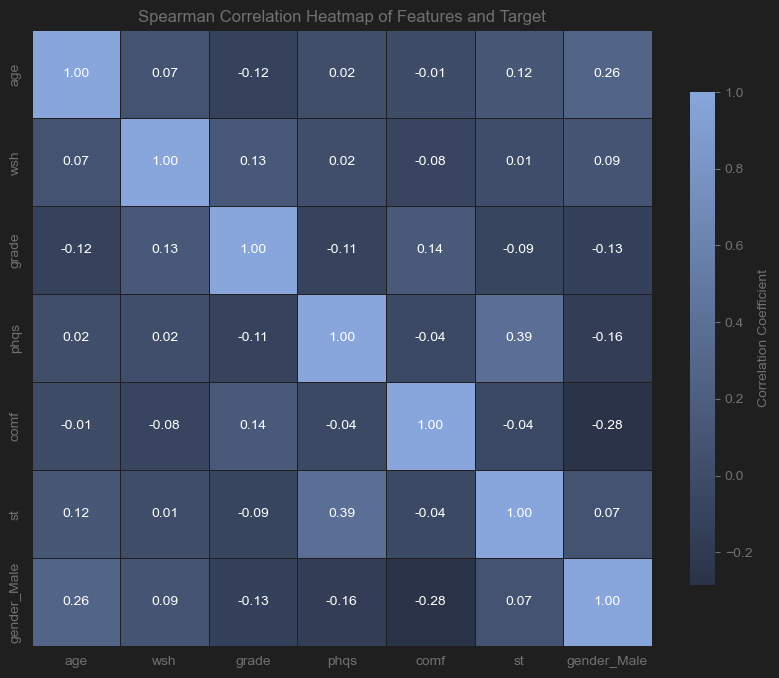

In [60]:
# Graph 6: Spearman Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['age', 'wsh', 'grade', 'phqs', 'comf', 'st', 'gender_Male']].corr(method='spearman')

colors = [EDGE_COLOR, PRIMARY_COLOR]  # Dark blue-gray to light blue-lavender
custom_cmap = LinearSegmentedColormap.from_list("custom_blue", colors, N=256)

# Create the heatmap with custom parameters
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap=custom_cmap,  # Using our custom color map 
            fmt='.2f', 
            linewidths=0.5,
            linecolor=BACKGROUND_COLOR,  # Dark gray for grid lines
            annot_kws={"color": WHITE},  # White annotation text
            cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"})

plt.title('Spearman Correlation Heatmap of Features and Target')
plt.show()

the Spearman correlations between features and phqs are quite weak, with the strongest being st at 0.39 and gender_Male at -0.16. 

This suggests that while there are some monotonic relationships, they might not be statistically significant, especially for features like gender_Male. To determine if gender_Male is meaningfully related to phqs, a t-test is a good approach. 

The t-test will provide a p-value, which indicates the statistical significance of the difference in phqs means between males and females (since gender_Male is binary: 0 for female, 1 for male).

In [61]:
# - 'gender_Male': 0 for female, 1 for male
# - 'phqs': target variable (0 to 4)

# Separate phqs values by gender
phqs_male = df[df['gender_Male'] == 1]['phqs']
phqs_female = df[df['gender_Male'] == 0]['phqs']

# Perform two-sample t-test (assuming equal variance for simplicity)
t_stat, p_value = ttest_ind(phqs_male, phqs_female, equal_var=False)  # Welch's t-test for unequal variance

# Print results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in phqs between males and females.")
else:
    print("Fail to reject the null hypothesis: No significant difference in phqs between males and females.")

T-statistic: -3.5203
P-value: 0.0005
Reject the null hypothesis: There is a significant difference in phqs between males and females.


### Context with Spearman Correlation
- Spearman Correlation: The heatmap showed gender_Male had a correlation of -0.16 with phqs, indicating a weak negative monotonic relationship (as gender_Male increases from 0 to 1, phqs tends to decrease).
- t-test Confirmation: The t-test confirms this relationship is statistically significant (p = 0.0005), meaning the -0.16 correlation isn’t just random noise—there’s a real effect of gender on phqs.


**Comparison with Other Features:**
st had the strongest correlation (0.39), and now gender_Male (-0.16) is confirmed as significant.
Other features like age (0.02), wsh (0.02), grade (-0.11), and comf (-0.04) have weaker correlations and haven’t been tested for significance yet.

In [62]:
# Define features and target
X = df.drop("phqs", axis=1)
y = df["phqs"]

In [63]:
num_cols = ["age", "comf", "st"]  # List of columns to scale
preprocessor = RobustScaler()           # Initialize the scaler

-  Split data into training and testing sets
- test_size=0.2 means 20% of data is for testing, 80% for training
 - stratify=y ensures the class distribution of 'phqs' is the same in both sets
 - random_state=42 ensures reproducibility of the split


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

- Scale the numerical features
- Fit the scaler on training data and transform it to avoid data leakage
- Transform test data using the same scaler fitted on training data


In [65]:
X_train_num = preprocessor.fit_transform(X_train[num_cols])  # Scale training numerical features
X_test_num = preprocessor.transform(X_test[num_cols])        # Scale testing numerical features



- Combine scaled numerical features with other features
 - np.hstack horizontally stacks arrays to combine scaled numerical columns with unscaled columns
 - The unscaled columns ('wsh', 'grade', 'gender_Male') are extracted as values and appended


In [66]:
X_train_processed = np.hstack((X_train_num, X_train[["wsh", "grade", "gender_Male"]].values))
X_test_processed = np.hstack((X_test_num, X_test[["wsh", "grade", "gender_Male"]].values))

- Apply SMOTE to balance the training data
 - SMOTE (Synthetic Minority Oversampling Technique) generates synthetic samples for minority classes (e.g., "Minimal Depression" at 2.4%)
 - This addresses class imbalance in 'phqs' (e.g., fewer Minimal cases) but only on training data
- random_state=42 ensures consistent synthetic sample generation


In [67]:
smote = SMOTE(random_state=42)                            # Initialize SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train_processed, y_train)  # Apply SMOTE

- Display the data after SMOTE
- Convert the SMOTE-transformed features and labels into a DataFrame
- The first 3 columns are scaled numerical features (age, comf, st)
- The last 3 columns are unscaled encoded features (wsh, grade, gender_Male)
- Add the target 'phqs' as the final column for context


In [68]:
smote_df = pd.DataFrame(
    data=np.column_stack((X_train_smote, y_train_smote)),  # Combine features and labels
    columns=["age_scaled", "comf_scaled", "st_scaled", "wsh", "grade", "gender_Male", "phqs"]  # Define column names
)
print("Data after SMOTE (first 10 rows):")
print(smote_df.head(10))  # Display the first 10 rows to inspect the balanced data
print("------------------------------------------")
print("Shape of data after SMOTE:", smote_df.shape)
print("------------------------------------------")

# Display the class distribution after SMOTE to confirm balancing
# - SMOTE balances minority classes (e.g., Minimal) to match the majority class size
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Data after SMOTE (first 10 rows):
   age_scaled  comf_scaled  st_scaled  wsh  grade  gender_Male  phqs
0        -1.0    -0.333333  -0.333333  1.0    0.0          1.0   2.0
1         0.0     0.666667  -0.333333  2.0    3.0          1.0   3.0
2         0.0    -2.333333   0.000000  1.0    0.0          1.0   4.0
3         1.0    -0.333333   1.000000  2.0    1.0          1.0   4.0
4         0.0    -0.333333   1.333333  3.0    3.0          0.0   4.0
5         0.0    -0.333333  -2.666667  0.0    2.0          0.0   2.0
6        -2.0    -0.666667  -0.666667  1.0    1.0          0.0   2.0
7        -1.0     0.333333   0.000000  0.0    1.0          0.0   3.0
8        -2.0    -0.666667   0.000000  1.0    2.0          0.0   2.0
9         2.0    -1.333333   0.333333  2.0    2.0          0.0   4.0
------------------------------------------
Shape of data after SMOTE: (485, 7)
------------------------------------------
Class distribution after SMOTE:
phqs
2    97
3    97
4    97
1    97
0    97
Name: co

### Best 5 Models to Test
From your list of 10 models, here are the top 5, ranked by suitability for your data, along with reasons and recommended parameters from the curated param_grids we discussed earlier:

1. Random Forest
Why It’s Best:
- Non-Linearity: Random Forest (an ensemble of decision trees) excels at capturing non-linear relationships, ideal for st (0.39) and comf’s non-linear trends.
- Class Imbalance: Works well with SMOTE; can handle imbalanced classes by focusing on minority classes (e.g., Severe) through feature splits.
- Feature Importance: Provides feature importance scores, confirming st and gender_Male’s roles (as seen in correlations and t-test).
- Robustness: Less prone to overfitting than a single Decision Tree, thanks to averaging across trees.
- Performance: Often performs well on small datasets with complex patterns, like yours (426 rows).

**Recommended Parameters to Try (from curated param_grids):**

    - n_estimators: [100, 200] (more trees for better accuracy).
    - max_depth: [10, 20] (limits overfitting while capturing patterns).
    - min_samples_split: [5] (robust splits for small dataset).

Why These Parameters: max_depth=10 prevents overfitting to outliers (e.g., comf = -8), n_estimators=200 leverages ensemble strength for Severe class prediction.

---
2. Gradient Boosting
Why It’s Best:
- Non-Linearity: Gradient Boosting builds trees sequentially, correcting errors, and captures non-linear relationships well (e.g., st’s 0.39 correlation).
- Class Imbalance: Excels with imbalanced data by focusing on misclassified points (e.g., Severe cases) after SMOTE.
- Feature Focus: Prioritizes important features like st and gender_Male through iterative learning.
- Performance: Often outperforms other models on small, complex datasets when tuned properly.

**Recommended Parameters to Try:**

    - n_estimators: [100, 200] (enough stages for accuracy).
    - learning_rate: [0.01, 0.1] (steady learning to avoid overfitting).
    - max_depth: [3, 5] (shallow trees to prevent overfitting).

Why These Parameters: learning_rate=0.01 with n_estimators=200 ensures gradual learning, focusing on st and gender_Male, while max_depth=5 balances complexity.

---
3. SVC (Support Vector Classifier)
Why It’s Best:
- Non-Linearity: With the rbf kernel, SVC can model non-linear relationships (e.g., st vs. phqs), confirmed by your pair plot and Spearman usage.
- Class Imbalance: Works well with SMOTE; the C parameter can balance focus on minority classes.
- Robustness: rbf kernel with gamma='scale' adapts to your 6 features, handling outliers in comf when C is small.
- Binary Feature Handling: Effectively uses gender_Male (binary) to separate classes.

**Recommended Parameters to Try:**

    - C: [0.1, 1] (avoid overfitting to outliers).
    - kernel: ['rbf'] (best for non-linear data).
    - gamma: ['scale'] (adapts to feature variance).

Why These Parameters: C=0.1 prevents overfitting to outliers, rbf captures non-linear patterns, and gamma='scale' adjusts to your data.

---
4. AdaBoost
Why It’s Best:
- Non-Linearity: AdaBoost builds weak learners (e.g., shallow trees) sequentially, focusing on hard-to-classify points, capturing non-linear trends.
- Class Imbalance: Naturally focuses on misclassified points (e.g., Severe cases), complementing SMOTE.
- Feature Focus: Can emphasize st and gender_Male by weighting their influence in iterations.
- Simplicity: Works well on small datasets (426 rows) without extensive tuning.

**Recommended Parameters to Try:**

    - n_estimators: [100, 200] (more iterations for better focus on Severe).
    - learning_rate: [0.01, 0.1] (steady learning for imbalanced data).

Why These Parameters: learning_rate=0.01 with n_estimators=200 ensures focus on minority classes without overfitting.

---
5. KNN (K-Nearest Neighbors)
Why It’s Best:
- Non-Linearity: KNN is inherently non-linear, predicting based on local patterns (e.g., Severe cases with high st might cluster).
- Class Imbalance: After SMOTE, KNN can focus on minority classes by using weights='distance' (closer points matter more).
- Feature Handling: Works well with gender_Male (binary) and st (continuous), especially with RobustScaler handling outliers.
- Simplicity: Effective for small datasets with clear clusters.

**Recommended Parameters to Try:**

    - n_neighbors: [5, 7, 9] (balance local vs. global patterns).
    - weights: ['distance'] (focus on closer points for Severe).
    - p: [2] (Euclidean distance for continuous features).


In [69]:
# Define the top 5 models with initial parameters
models = {
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=200, max_depth=10, min_samples_split=5),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=5),
    "SVC": SVC(random_state=42, C=1, kernel='rbf', gamma='scale'),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100, learning_rate=0.1),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance', p=2)
}

### Train and Evaluate Models

We train each model on the SMOTE-balanced training data and evaluate performance on the test set using Accuracy, F1 Weighted, and F1 Severe metrics.

In [70]:
# Train and evaluate each model
results = []
for name, model in models.items():
    # Train the model
    model.fit(X_train_smote, y_train_smote)
    
    # Predict on the test set
    y_pred = model.predict(X_test_processed)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1_weighted = f1_score(y_test, y_pred, average="weighted")
    severe_class = 4
    f1_severe = f1_score(y_test, y_pred, labels=[severe_class], average=None)[0] if severe_class in y_test else 0
    
    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "F1 Weighted": f1_weighted,
        "F1 Severe": f1_severe
    })
    
    # Print classification report
    print(f"\n{name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Minimal", "Mild", "Moderate", "Moderately Severe", "Severe"], zero_division=0))


Random Forest Classification Report:

                   precision    recall  f1-score   support

          Minimal       0.00      0.00      0.00         2
             Mild       0.21      0.20      0.21        15
         Moderate       0.27      0.29      0.28        24
Moderately Severe       0.25      0.26      0.26        23
           Severe       0.44      0.38      0.41        21

         accuracy                           0.28        85
        macro avg       0.24      0.23      0.23        85
     weighted avg       0.29      0.28      0.29        85


Gradient Boosting Classification Report:

                   precision    recall  f1-score   support

          Minimal       0.00      0.00      0.00         2
             Mild       0.27      0.20      0.23        15
         Moderate       0.17      0.17      0.17        24
Moderately Severe       0.21      0.30      0.25        23
           Severe       0.47      0.38      0.42        21

         accuracy           

### Compare Model Performance

We create a DataFrame to compare the performance of all models.

In [71]:
# Create a DataFrame to compare model performance
results_df = pd.DataFrame(results)
print("\nModel Comparison:\n", results_df)

# Identify the best model based on F1 Weighted
best_model_name = results_df.loc[results_df["F1 Weighted"].idxmax(), "Model"]
print(f"\nBest Model: {best_model_name}")


Model Comparison:
                Model  Accuracy  F1 Weighted  F1 Severe
0      Random Forest  0.282353     0.286014          0
1  Gradient Boosting  0.258824     0.259455          0
2                SVC  0.294118     0.279511          0
3           AdaBoost  0.317647     0.278768          0
4                KNN  0.258824     0.262362          0

Best Model: Random Forest


### Feature Importance Analysis

For tree-based models, we extract feature importance to understand which features most influence predictions.

In [72]:
# Show feature importance for tree-based models
if best_model_name in ["Random Forest", "Gradient Boosting", "AdaBoost"]:
    best_model = models[best_model_name]
    feature_names = ["age", "comf", "st", "wsh", "grade", "gender_Male"]
    feature_importance = pd.DataFrame({
        "Feature": feature_names,
        "Importance": best_model.feature_importances_
    }).sort_values(by="Importance", ascending=False)
    print("\nFeature Importance:\n", feature_importance)


Feature Importance:
        Feature  Importance
2           st    0.269127
1         comf    0.219705
3          wsh    0.138140
0          age    0.134763
4        grade    0.133477
5  gender_Male    0.104787
